In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set_style("ticks")

In [2]:
series = pd.read_csv('Data/penguins.csv')
series['Month'] = pd.to_datetime(series['Month'])
series

,Month,Number
0,2000-01-01,753
1,2000-02-01,448
2,2000-03-01,356
3,2000-04-01,504
4,2000-05-01,698
...,...,...
79,2006-08-01,301
80,2006-09-01,389
81,2006-10-01,624
82,2006-11-01,748


In [3]:
series = series.set_index('Month')
series

,Number
Month,
2000-01-01,753
2000-02-01,448
2000-03-01,356
2000-04-01,504
2000-05-01,698
...,...
2006-08-01,301
2006-09-01,389
2006-10-01,624


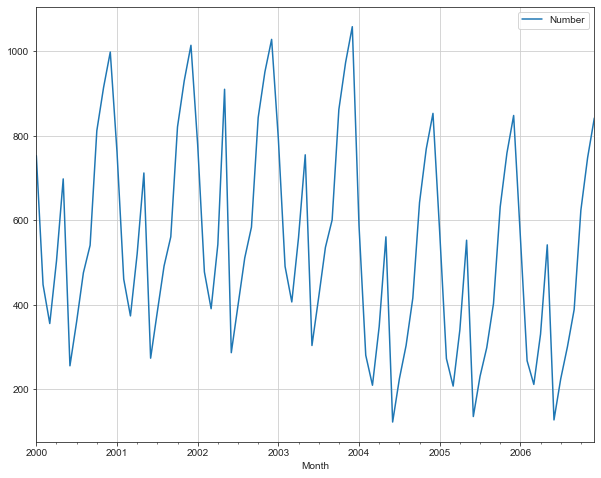

In [10]:
series.plot(grid=True, figsize=(10,8))
plt.show()

<AxesSubplot:xlabel='Month'>

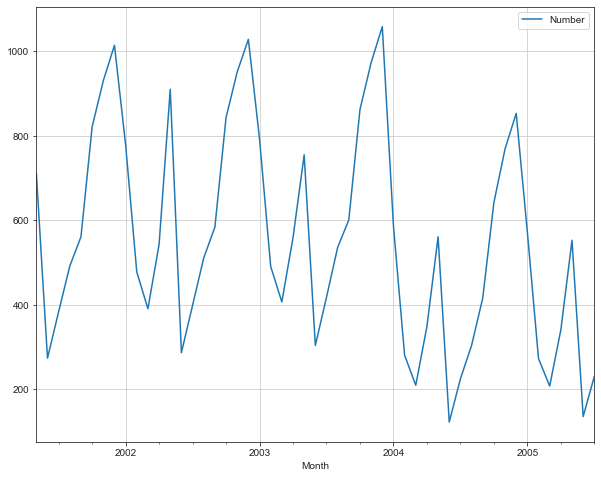

In [9]:
start_date = datetime(2001,5,1)
end_date = datetime(2005,7,1)
series[(start_date <= series.index) & (series.index <= end_date)].plot(grid=True, figsize=(10,8))

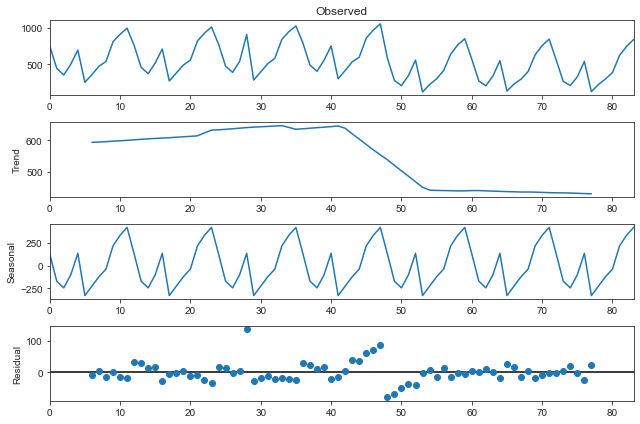

In [12]:
# here I am using the default version of the statsmodels library
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series.values,model='additive',period=12)
plt.rcParams['figure.figsize'] = [9.0,6.0]
result.plot()
plt.show()

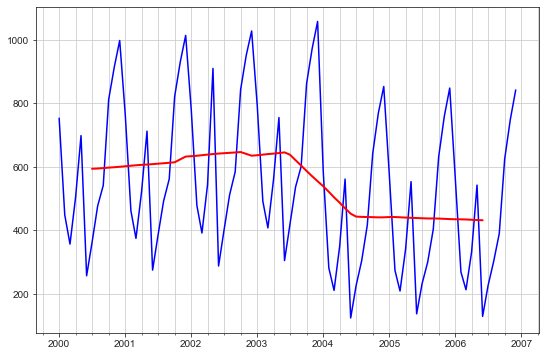

In [13]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(series.index, series['Number'], c='blue')
plt.plot(series.index, result.trend, c='red',lw=2)

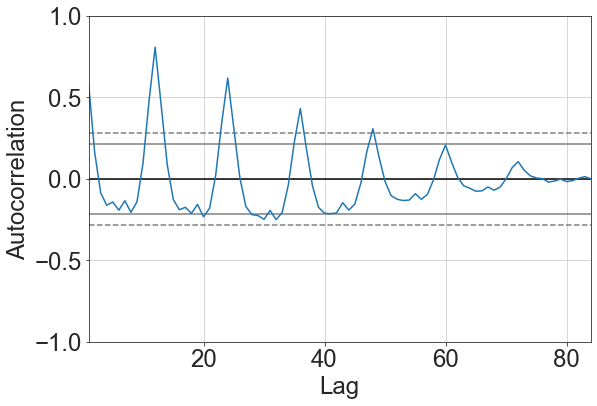

In [26]:
from statsmodels.tsa.arima.model import ARIMA # ARIMA has an integrated moving average
from sklearn.metrics import mean_squared_error as mse
from pandas.plotting import autocorrelation_plot 
# Autocorrelation is a measure of how well a series correlates with itself
# Like how well x(t) correlates with x(t-k), plotted for varying k ,on the entire data set. k is "lag"

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

autocorrelation_plot(series)
plt.show()

C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mnelk\

                               SARIMAX Results                                
Dep. Variable:                 Number   No. Observations:                   84
Model:                ARIMA(12, 1, 1)   Log Likelihood                -459.018
Date:                Fri, 08 Apr 2022   AIC                            946.035
Time:                        14:27:22   BIC                            979.899
Sample:                    01-01-2000   HQIC                           959.640
                         - 12-01-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0811      0.108     -0.751      0.453      -0.293       0.131
ar.L2         -0.1208      0.095     -1.270      0.204      -0.307       0.066
ar.L3         -0.1011      0.123     -0.821      0.4

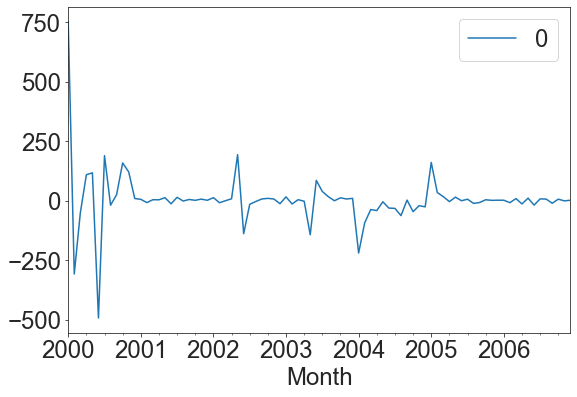

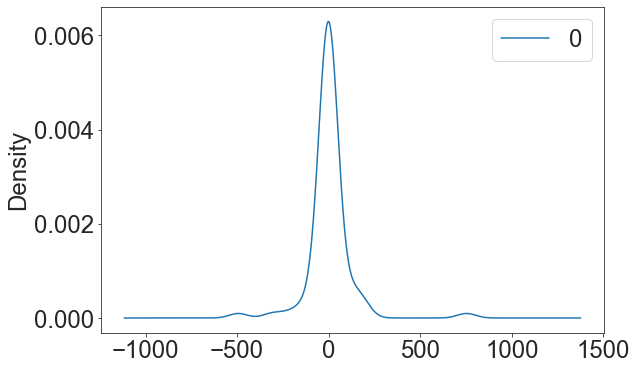

                0
count   84.000000
mean     3.498321
std    120.061892
min   -493.478300
25%    -13.206171
50%      1.560054
75%      9.645355
max    753.000000


In [27]:
model = ARIMA(series, order=(12,1,1))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
from scipy.stats.morestats import anderson
from scipy.stats import kstest, anderson

C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=311.201989, expected=299.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=411.954752, expected=403.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=627.201935, expected=632.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=756.400486, expected=759.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=846.367766, expected=848.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=558.328021, expected=561.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=280.156000, expected=268.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=201.097006, expected=212.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=345.913335, expected=331.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=530.868496, expected=542.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.090586, expected=128.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=218.037846, expected=225.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=295.715853, expected=301.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=399.880293, expected=389.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=617.090301, expected=624.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=750.083342, expected=748.000000


C:\Users\mnelk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=840.947229, expected=842.000000
Test Root MSE: 10.172


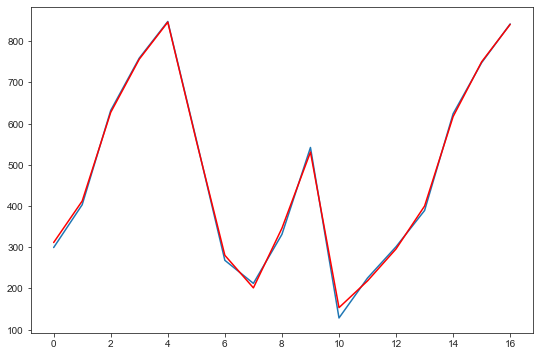

In [21]:
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(12,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mse(test, predictions)
print('Test Root MSE: %.3f' % np.sqrt(error))
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [22]:
N = 100
x = np.random.randn(N)

In [23]:
# linear temporal dependency
y = np.zeros(N)
for i in range(2, N):
    y[i] = 0.5 * x[i] - 0.2 * x[i-1] + 0.1 * x[i-2] 

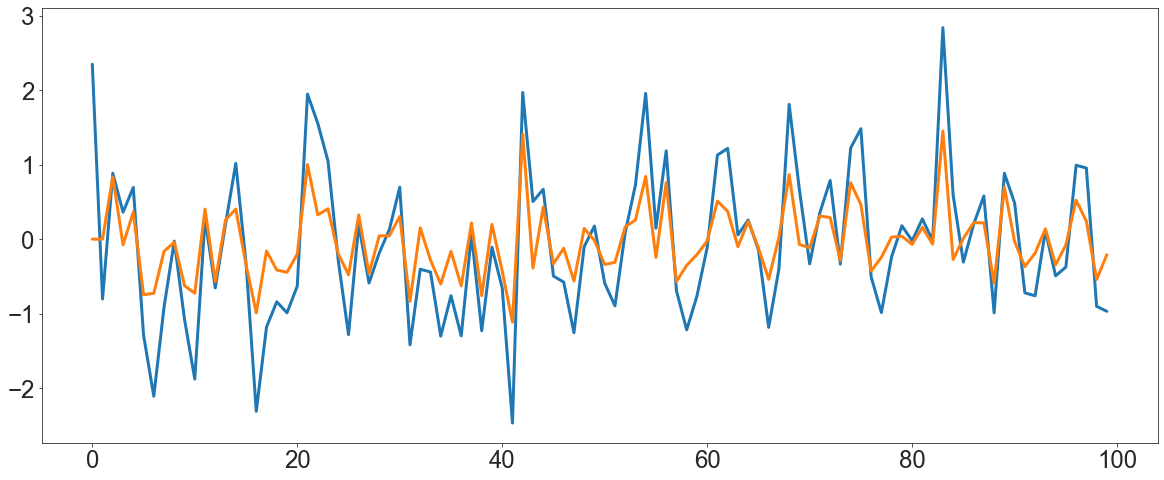

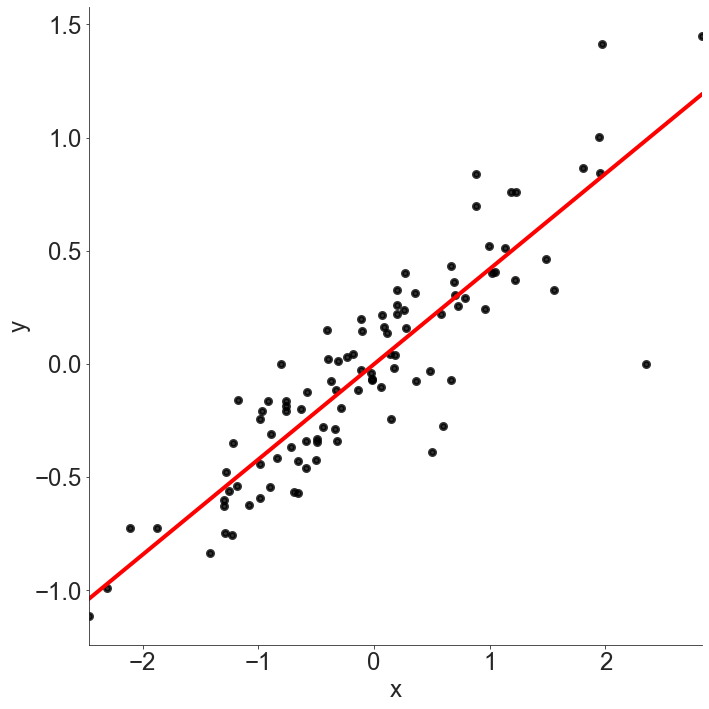

In [24]:
font_size = 24
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.figure(figsize=(20,8))
plt.plot(x,lw=3)
plt.plot(y,lw=3)
sns.lmplot(x='x',y='y',data=pd.DataFrame({'x':x,'y':y}),ci=None,scatter_kws={'color':'black','lw':3},line_kws={'color':'red','lw':4},height=10)

### Now we can simulate nonlinear dependecy and the linear autoregression fails

In [ ]:
u = np.zeros(N)
for i in range(2, N):
    u[i] = 0.5 * x[i] ** 2 - 0.2 * x[i-1] ** 3 + 0.1 * x[i-2] ** 4

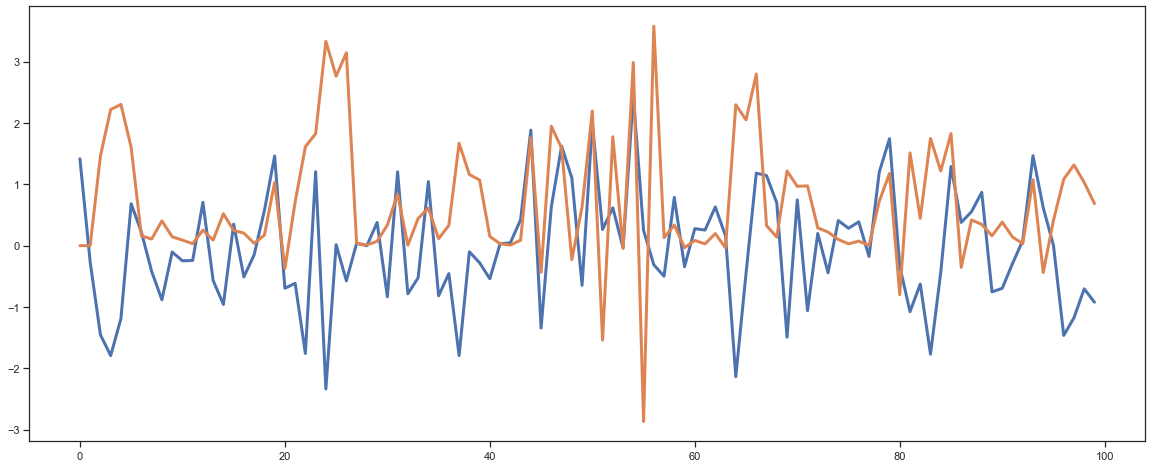

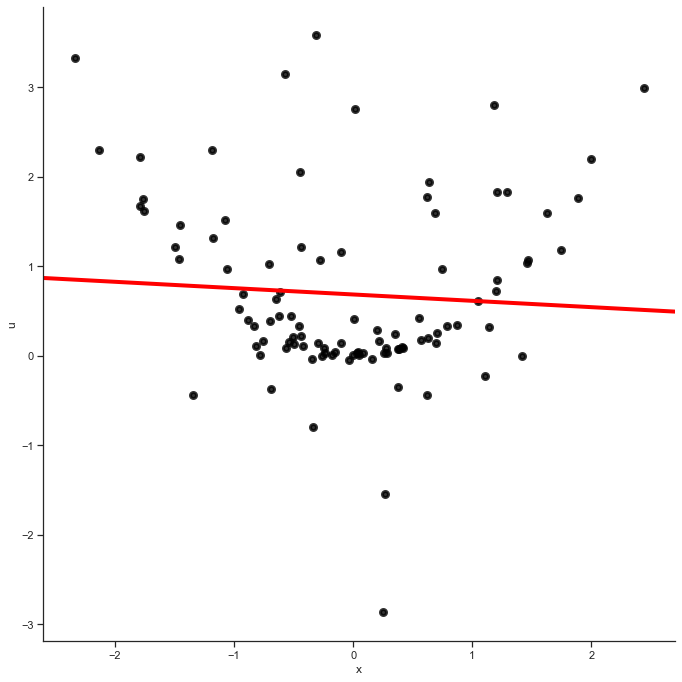

In [ ]:
font_size = 24
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.figure(figsize=(20,8))
plt.plot(x,lw=3)
plt.plot(u,lw=3)
sns.lmplot(x='x',y='u',data=pd.DataFrame({'x':x,'u':u}),ci=None,scatter_kws={'color':'black','lw':3},line_kws={'color':'red','lw':4},height=10)